In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import kaepora as kpora
import kaepora_plot as kplot
import spectral_analysis as sa
import matplotlib.pyplot as plt
import composite

# Installing Kaepora v1.2

- Go to https://github.com/msiebert1/kaepora and create a new python 2.7 environment containing the list of prerequisite packages
- git clone https://github.com/msiebert1/kaepora.git
- Go to https://msiebert1.github.io/kaepora/ and download kaepora_v1.2.db to the kaepora/data/ directory
- Navigate to kaepora/src/ and open this notebook


# Query Kaepora for maximum-light Foundation spectra
- Bins have been chosen so the average spectra are well-matched in phase
- This example removes outlier spectra that do not pass our quality cuts

In [53]:
vel_queries_found = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'foundation' and Events.Foundation_vel >= -11.8 and Events.Av_25 > 0 and phase between -3 and 5 and filename != 'Foundation_asassn16la_phase=-2.739901715.txt' and filename != 'Foundation_2017cpu_phase=-1.61488826747.txt' and filename != 'Foundation_2017ckx_phase=-5.02466525823.txt' and filename != 'Foundation_asassn15np_phase=-1.63200650294.txt' and filename != 'Foundation_asassn16jf_phase=-6.05004316433.txt' and filename != 'Foundation_asassn15nr_phase=4.77672098892.txt' and filename != 'Foundation_2016gsu_phase=-2.009279776.txt' and Events.SN != 'ps16fbb'",
                     "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'foundation' and Events.Foundation_vel between -30 and -11.8 and Events.Av_25 > 0 and phase between -5 and 5 and filename != 'Foundation_2016cvv_phase=1.55477190182.txt'"]
composites_found, sn_arrays_found, og_sn_arrays_found, boot_sn_arrays_found = kpora.make_composite(vel_queries_found, boot=True, medmean=1, verbose=True, av_corr=True, shape_param='Foundation_x1',
                                                                         gini_balance=True, combine=True, get_og_arr=True, make_corr=True, scale_region=[5500,5700],
                                                                         db_file='../data/kaepora_v1.2.db')


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'foundation' and Events.Foundation_vel >= -11.8 and Events.Av_25 > 0 and phase between -3 and 5 and filename != 'Foundation_asassn16la_phase=-2.739901715.txt' and filename != 'Foundation_2017cpu_phase=-1.61488826747.txt' and filename != 'Foundation_2017ckx_phase=-5.02466525823.txt' and filename != 'Foundation_asassn15np_phase=-1.63200650294.txt' and filename != 'Foundation_asassn16jf_phase=-6.05004316433.txt' and filename != 'Foundation_asassn15nr_phase=4.77672098892.txt' and filename != 'Foundation_2016gsu_phase=-2.009279776.txt' and Events.SN != 'ps16fbb'
20 Total Spectra found
0 flagged spectra removed 20 spectra left
0 spectra of peculiar Ias removed 20 spectra left
20 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
20 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
asassn15il Found

# Plot the Foundation composite spectra

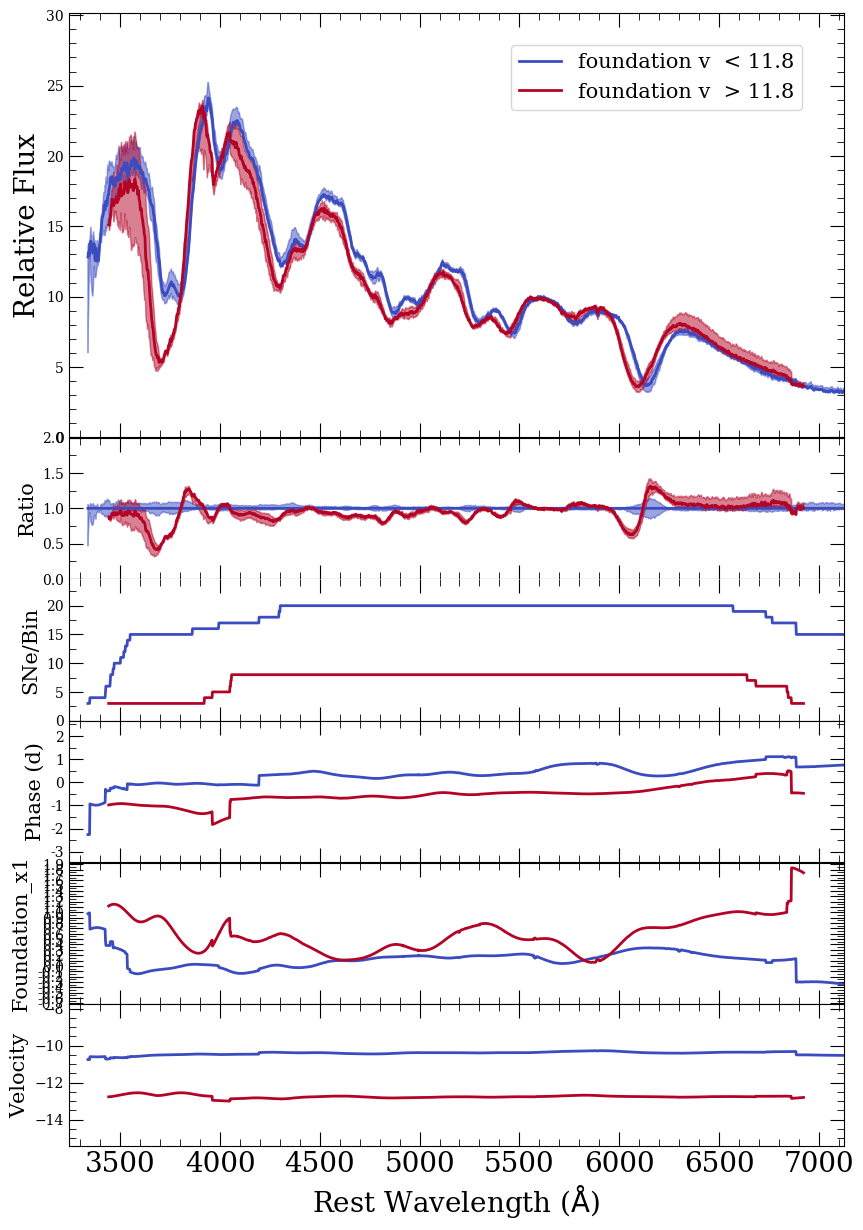

In [54]:
kpora.set_min_num_spec(composites_found, 3)
kplot.comparison_plot(composites_found, scale_type=False, min_num_show=3, extra=True, legend_labels = ['foundation v  < 11.8', 'foundation v  > 11.8'], scale_region = [5500, 5700], verbose=False)


# Query Kaepora for all maximum-light spectra
- Bins have been chosen to best match the phase and light-curve shape of the Foundation composite spectra
- Data have already been controlled for quality (Siebert et al. 2019)

In [33]:
kpora_queries = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 2 and ((dm15_source > 1. and dm15_source < 1.3) or (dm15_from_fits > 1. and dm15_from_fits < 1.3)) and (si_v0 >= -11800 and si_v0 <= -8500) and source != 'foundation'",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 2 and ((dm15_source > 1. and dm15_source < 1.3) or (dm15_from_fits > 1. and dm15_from_fits < 1.3)) and si_v0 < -11800 and source != 'foundation'"]

composites_kpora, sn_arrays_kpora, og_sn_arrays_kpora, boot_sn_arrays_kpora = kpora.make_composite(kpora_queries, boot=True, medmean=1, verbose=True, av_corr=True, shape_param='dm15',
                                                                         gini_balance=True, combine=True, get_og_arr=True, make_corr=True, scale_region=[5500,5700], 
                                                                         db_file='../data/kaepora_v1.2.db')

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 2 and ((dm15_source > 1. and dm15_source < 1.3) or (dm15_from_fits > 1. and dm15_from_fits < 1.3)) and (si_v0 >= -11800 and si_v0 <= -8500) and source != 'foundation'
113 Total Spectra found
5 flagged spectra removed 108 spectra left
0 spectra of peculiar Ias removed 108 spectra left
106 spectra of SNe that have host reddening corrections
Arrays cleaned
106 spectra may have telluric contamination
40 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
2003cq_combined None bsnip 29.24168551641482 -1.1777927808608528 1.1999999999999997 3036.0 10064.0
2005ag_combined None bsnip 18.893755704106137 -0.6944911897764504 1.0465189775571149 3504.0 8566.0
2005cf_combined None uv 240.66851599168646 -0.7539310819849613 1.1 2090.0 10432.0
2002ck_combined None cfa 48.40933934923734 0.978993234468574 1.08 3616.0 7320.0
1996x_combined None other 425.55011

# Plot the Kaepora composite spectra

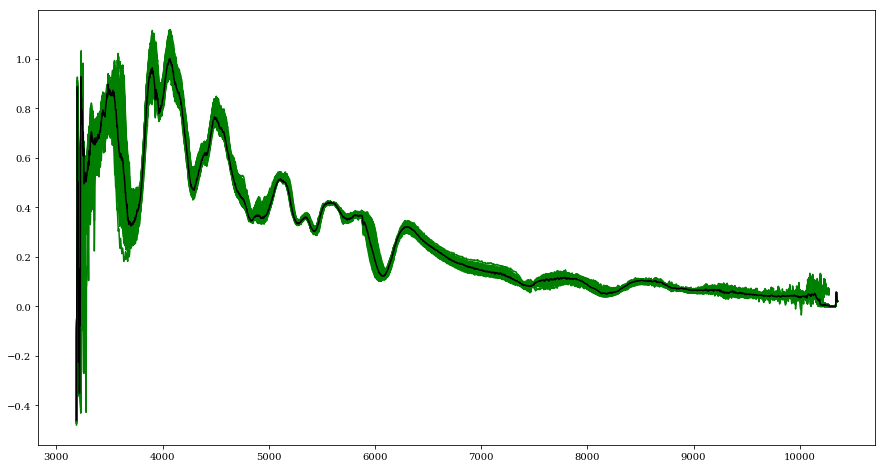

In [6]:
plt.figure(figsize = [15,8])
for b in boot_sn_arrays_kpora[1]:
    plt.plot(b.wavelength, b.flux, 'g')
plt.plot(composites_kpora[1].wavelength, composites_kpora[1].flux, 'k')
plt.show()

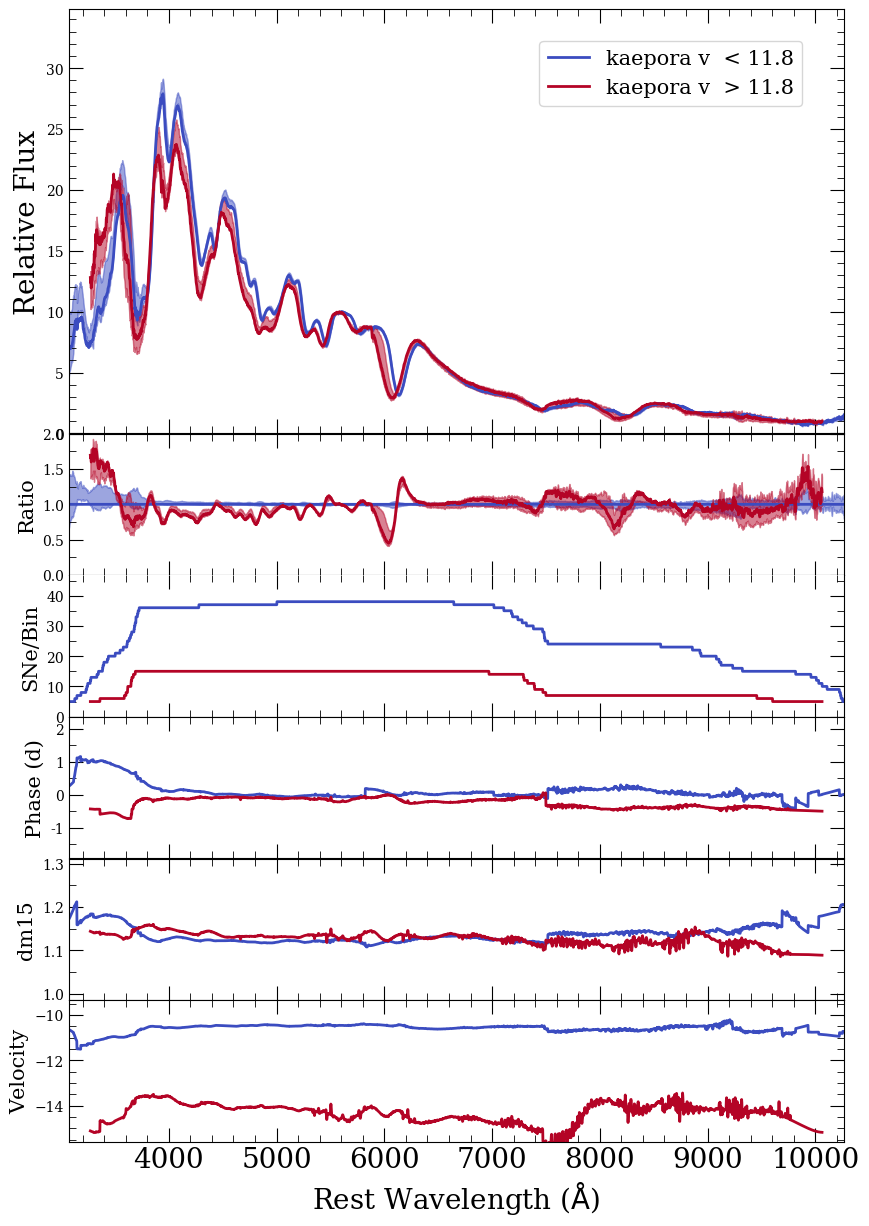

In [7]:
kpora.set_min_num_spec(composites_kpora, 5)
kplot.comparison_plot(composites_kpora, scale_type=False, min_num_show=5, extra=True, scale_region=[5500, 5700], legend_labels = ['kaepora v  < 11.8', 'kaepora v  > 11.8'], verbose=False)


In [10]:
x1s = []
for sn in sn_arrays_found[0]:
    x1s.append(sn.event_data['Foundation_x1'])
x1s2 = []
for sn in sn_arrays_found[1]:
    x1s2.append(sn.event_data['Foundation_x1'])

-0.18748806272293064


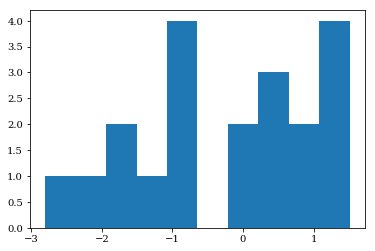

In [9]:
print np.average(x1s)
plt.hist(x1s)
plt.show()

-0.014762782050652512


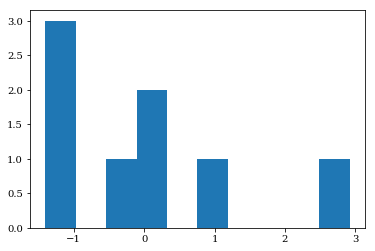

In [11]:
print np.average(x1s2)
plt.hist(x1s2)
plt.show()

0.00290271


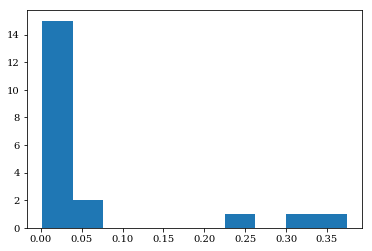

0.002739235


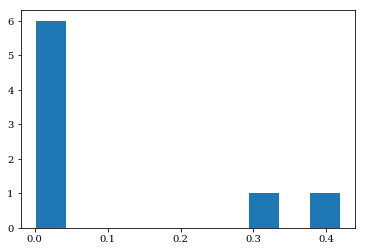

In [27]:
av_found1 = []
for sn in sn_arrays_found[0]:
    av_found1.append(sn.event_data['Av_25'])
av_found2 = []
for sn in sn_arrays_found[1]:
    av_found2.append(sn.event_data['Av_25'])
print np.median(av_found1)
plt.hist(av_found1)
plt.show()
print np.median(av_found2)
plt.hist(av_found2)
plt.show()

0.17385


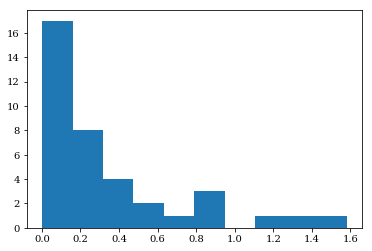

0.2872


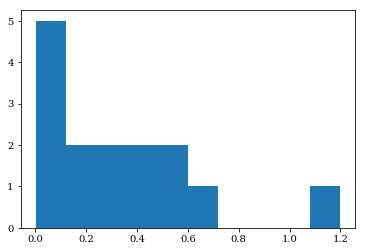

In [28]:
av_kaepora1 = []
for sn in sn_arrays_kpora[0]:
    av_kaepora1.append(sn.event_data['Av_25'])
av_kaepora2 = []
for sn in sn_arrays_kpora[1]:
    av_kaepora2.append(sn.event_data['Av_25'])
print np.median(av_kaepora1)
plt.hist(av_kaepora1)
plt.show()
print np.median(av_kaepora2)
plt.hist(av_kaepora2)
plt.show()

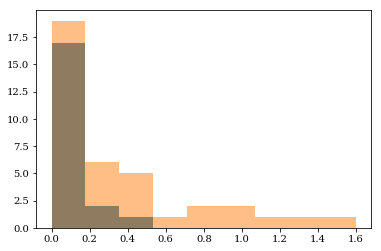

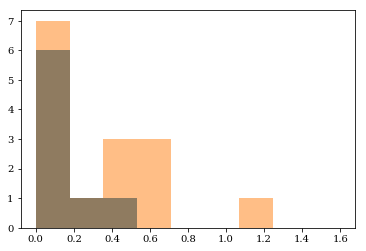

In [35]:
bins = np.linspace(0,1.6, num=10)
plt.hist(av_found1, bins = bins)
plt.hist(av_kaepora1,  bins = bins, alpha = .5)
plt.show()
plt.hist(av_found2, bins = bins)
plt.hist(av_kaepora2,  bins = bins, alpha = .5)
plt.show()

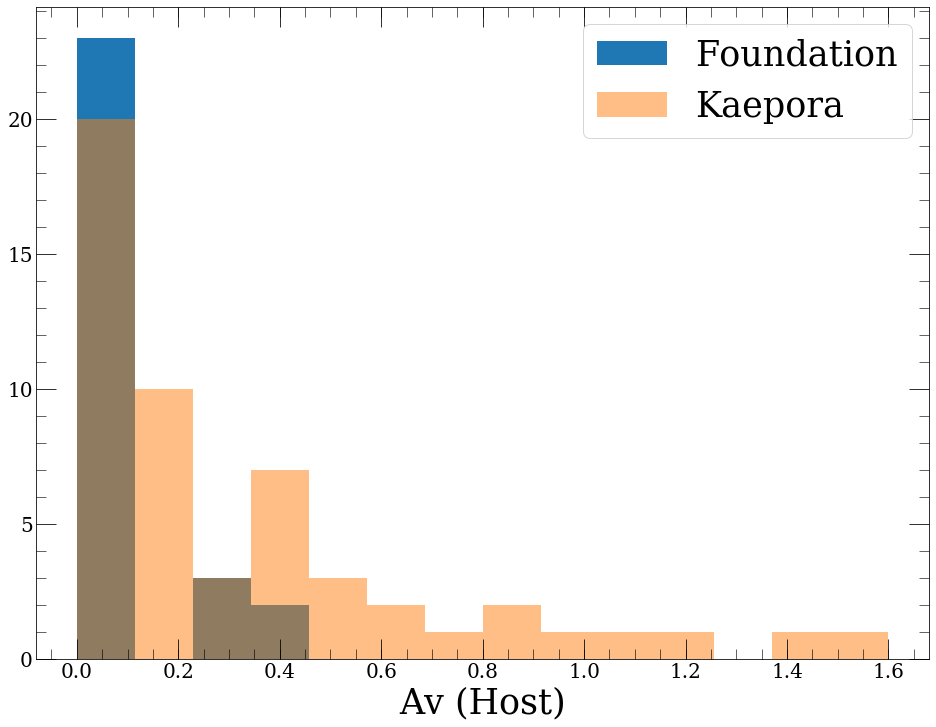

In [47]:
kplot.basic_format()
# plt.figure(figsize = [14,10])
bins = np.linspace(0,1.6, num=15)
plt.hist(np.concatenate((np.asarray(av_found1),np.asarray(av_found2))), bins = bins, label = 'Foundation')
plt.hist(np.concatenate((np.asarray(av_kaepora1),np.asarray(av_kaepora2))),  bins = bins, alpha = .5, label = 'Kaepora')
plt.xlabel('Av (Host)', fontsize = 35)
plt.legend(fontsize = 35)
plt.show()

In [24]:
# av_found1 = []
# for sn in sn_arrays_found[0]:
#     av_found1.append(sn.event_data['Av_MW'])
# av_found2 = []
# for sn in sn_arrays_found[1]:
#     av_found2.append(sn.event_data['Av_MW'])
# print np.median(av_found1)
# plt.hist(av_found1)
# plt.show()
# print np.median(av_found2)
# plt.hist(av_found2)
# plt.show()

In [25]:
# av_kaepora1 = []
# for sn in sn_arrays_kpora[0]:
#     av_kaepora1.append(sn.event_data['Av_MW'])
# av_kaepora2 = []
# for sn in sn_arrays_kpora[1]:
#     av_kaepora2.append(sn.event_data['Av_MW'])
# print np.median(av_kaepora1)
# plt.hist(av_kaepora1)
# plt.show()
# print np.median(av_kaepora2)
# plt.hist(av_kaepora2)
# plt.show()

# Reddening Tests

In [35]:
kpora_queries = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 2 and ((dm15_source > 1. and dm15_source < 1.3) or (dm15_from_fits > 1. and dm15_from_fits < 1.3)) and (si_v0 >= -11800 and si_v0 <= -8500) and source != 'foundation'",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 2 and ((dm15_source > 1. and dm15_source < 1.3) or (dm15_from_fits > 1. and dm15_from_fits < 1.3)) and si_v0 < -11800 and source != 'foundation'"]

# spec_array_LV = kpora.grab(kpora_queries[0], verbose=True, db_file = '../data/kaepora_v1.2.db')
composites_kpora_no_corr, sn_arrays_kpora_no_corr, og_sn_arrays_kpora_no_corr, boot_sn_arrays_kpora_no_corr = kpora.make_composite(kpora_queries, boot=True, medmean=1, verbose=True, av_corr=True, shape_param='dm15',
                                                                         gini_balance=True, combine=True, get_og_arr=True, make_corr=True, scale_region=[5500,5700], low_av_test = 2., 
                                                                         db_file='../data/kaepora_v1.2.db')

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 2 and ((dm15_source > 1. and dm15_source < 1.3) or (dm15_from_fits > 1. and dm15_from_fits < 1.3)) and (si_v0 >= -11800 and si_v0 <= -8500) and source != 'foundation'
113 Total Spectra found
5 flagged spectra removed 108 spectra left
0 spectra of peculiar Ias removed 108 spectra left
106 spectra of SNe that have host reddening corrections
Arrays cleaned
106 spectra may have telluric contamination
40 total SNe
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
Non

Gini balancing...
Balanced after 17 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 2 and ((dm15_source > 1. and dm15_source < 1.3) or (dm15_from_fits > 1. and dm15_from_fits < 1.3)) and si_v0 < -11800 and source != 'foundation'
33 Total Spectra found
1 flagged spectra removed 32 spectra left
0 spectra of peculiar Ias removed 32 spectra left
32 spectra of SNe that have host reddening corrections
Arrays cleaned
32 spectra may have telluric contamination
18 total SNe
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
None has low reddening!
sn1998dk-19980831-ui.flm has low reddening!
sn2006ej-20060824.430-ui.flm has low reddening!
sn2007bz-20070426.419-ui.flm has low reddening!
sn1998dh-19980804.36-fast.flm has low reddening!
sn1998ef-19981029.31-fast.flm has low reddening!
sn2002kf-20021231.34-fast.flm has low re

In [95]:
BmV_LV_arr_no_corr = []
for spec in sn_arrays_kpora_no_corr[0]:
    mags_LV = sa.measure_mags(spec.wavelength[spec.x1:spec.x2], spec.flux[spec.x1:spec.x2])
    print spec.name, 'B = ', mags_LV[0], 'V = ', mags_LV[1], 'B-V = ', mags_LV[0] - mags_LV[1]
    if ~np.isnan(mags_LV[0] - mags_LV[1]) and spec.wavelength[spec.x1]<3700 and spec.wavelength[spec.x2]>7000:
        BmV_LV_arr_no_corr.append(mags_LV[0] - mags_LV[1])
BmV_HV_arr_no_corr = []
for spec in sn_arrays_kpora_no_corr[1]:
    mags_LV = sa.measure_mags(spec.wavelength[spec.x1:spec.x2], spec.flux[spec.x1:spec.x2])
    print spec.name, 'B = ', mags_LV[0], 'V = ', mags_LV[1], 'B-V = ', mags_LV[0] - mags_LV[1]
    if ~np.isnan(mags_LV[0] - mags_LV[1]) and spec.wavelength[spec.x1]<3700 and spec.wavelength[spec.x2]>7000:
        if spec.name == '2007jg':
            print mags_LV[0] - mags_LV[1]
        BmV_HV_arr_no_corr.append(mags_LV[0] - mags_LV[1])

2003cq_combined B =  -20.024333873976502 V =  -20.044417016438633 B-V =  0.02008314246213061
2005ag_combined B =  -20.126063030439525 V =  -20.06126029163351 B-V =  -0.06480273880601573
2005cf_combined B =  -20.13242637774922 V =  -20.07691565625867 B-V =  -0.05551072149054903
2002ck_combined B =  -20.10781723518763 V =  -20.07863221912774 B-V =  -0.02918501605988766
1996x_combined B =  -20.140209769715938 V =  -20.079225821960527 B-V =  -0.060983947755410384
1998bu_combined B =  -19.82098238244822 V =  -20.066551248000977 B-V =  0.24556886555275526
2002er_combined B =  -19.97974956620774 V =  -20.089004209630556 B-V =  0.10925464342281543
2008bf_combined B =  -20.19902575174816 V =  -20.079802802365304 B-V =  -0.1192229493828556
2006ax_combined B =  -20.232898847620536 V =  -20.12381827012987 B-V =  -0.10908057749066558
2005kc_combined B =  -19.68807458051152 V =  -20.105692725528982 B-V =  0.41761814501746386
2007af_combined B =  -20.03738054509955 V =  -20.06948099043363 B-V =  0.03

In [89]:
comp_LV_no_corr = composites_kpora_no_corr[0]
comp_HV_no_corr = composites_kpora_no_corr[1]
# kplot.plot_comp_and_all_spectra(comp_HV, sn_arrays_kpora_no_corr[1], dm15=True)

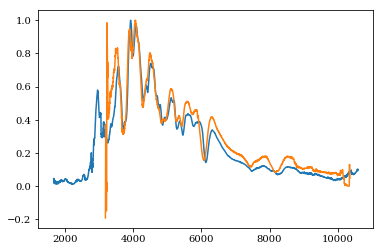

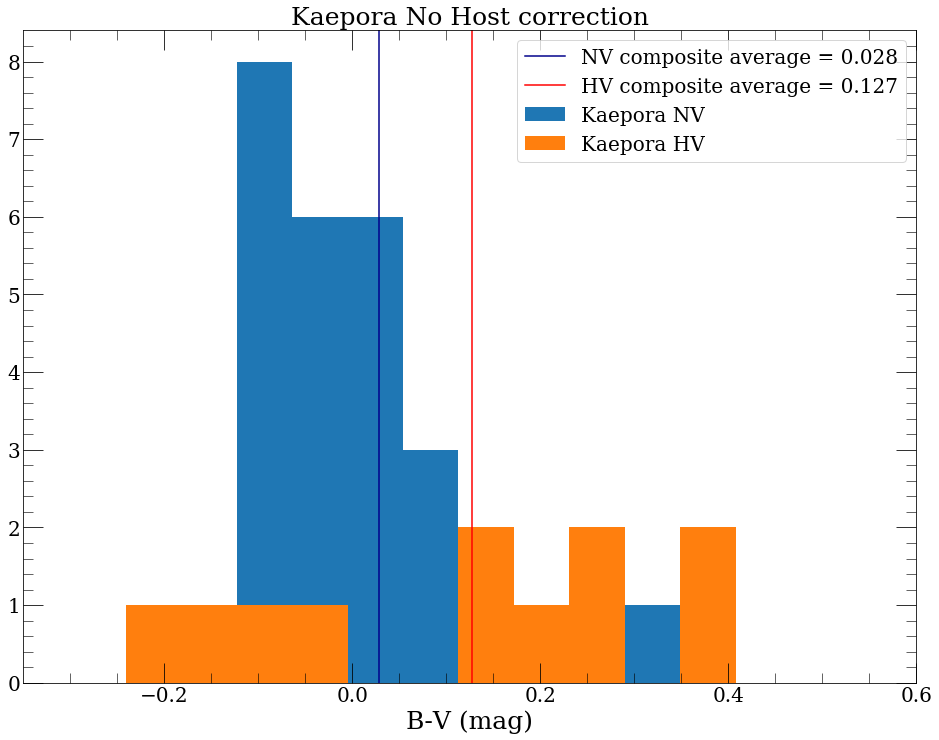

In [90]:
mags_LV_comp_no_corr = sa.measure_mags(comp_LV_no_corr.wavelength[comp_LV_no_corr.x1:comp_LV_no_corr.x2], comp_LV_no_corr.flux[comp_LV_no_corr.x1:comp_LV_no_corr.x2])
mags_HV_comp_no_corr = sa.measure_mags(comp_HV_no_corr.wavelength[comp_HV_no_corr.x1:comp_HV_no_corr.x2], comp_HV_no_corr.flux[comp_HV_no_corr.x1:comp_HV_no_corr.x2])
plt.plot(comp_LV_no_corr.wavelength[comp_LV_no_corr.x1:comp_LV_no_corr.x2], comp_LV_no_corr.flux[comp_LV_no_corr.x1:comp_LV_no_corr.x2])
plt.plot(comp_HV_no_corr.wavelength[comp_HV_no_corr.x1:comp_HV_no_corr.x2], comp_HV_no_corr.flux[comp_HV_no_corr.x1:comp_HV_no_corr.x2])
plt.show()
BmV_comp_LV_no_corr = mags_LV_comp_no_corr[0] - mags_LV_comp_no_corr[1]
BmV_comp_HV_no_corr = mags_HV_comp_no_corr[0] - mags_HV_comp_no_corr[1]

kplot.basic_format()
bins = np.linspace(-.3,2,num=40)
plt.hist(BmV_LV_arr_no_corr,bins=bins, label = 'Kaepora NV')
plt.hist(BmV_HV_arr_no_corr,bins=bins, label = 'Kaepora HV')
plt.axvline(BmV_comp_LV_no_corr, color='darkblue', label = 'NV composite average = ' + str(np.round(BmV_comp_LV_no_corr, 3)))
plt.axvline(BmV_comp_HV_no_corr, color='red', label = 'HV composite average = ' + str(np.round(BmV_comp_HV_no_corr, 3)))
plt.xlim(-.35,.6)
plt.xlabel('B-V (mag)', fontsize=25)
plt.legend(fontsize=20)
plt.title('Kaepora No Host correction', fontsize=25)
plt.savefig('../../Foundation/Dettman21/Kaepora_Colors_nohost.pdf')
plt.show()

2003cq_combined B =  -19.96267763472368 V =  -19.853353844601966 B-V =  -0.10932379012171367
2005ag_combined B =  -19.987463164631457 V =  -19.861583026183308 B-V =  -0.12588013844814938
2005cf_combined B =  -20.022231923068865 V =  -19.880860156853487 B-V =  -0.1413717662153786
2002ck_combined B =  -19.97877230115918 V =  -19.88017421813266 B-V =  -0.09859808302651984
1996x_combined B =  -19.95181410817903 V =  -19.873938467844404 B-V =  -0.07787564033462502
1998bu_combined B =  -20.05566284657157 V =  -19.90908458557635 B-V =  -0.14657826099521998
2002er_combined B =  -19.953452388028712 V =  -19.90326422610586 B-V =  -0.05018816192285058
2008bf_combined B =  -20.079983948531954 V =  -19.882700411346438 B-V =  -0.19728353718551617
2006ax_combined B =  -20.056063486982048 V =  -19.91992249690151 B-V =  -0.1361409900805377
2005kc_combined B =  -19.853610043356092 V =  -19.94834310178634 B-V =  0.09473305843024704
2007af_combined B =  -20.027050187936048 V =  -19.884052457783387 B-V =  

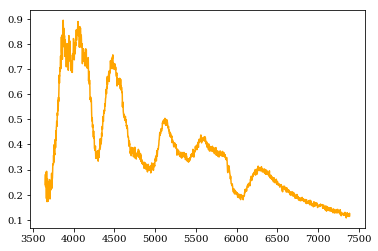

2002bo_combined B =  -20.168476680803735 V =  -20.008968715149827 B-V =  -0.15950796565390846
1997bp_combined B =  -19.954758929815945 V =  -19.963476725923837 B-V =  0.008717796107891473
2003ch_combined B =  -20.074496416801857 V =  -20.00864159337284 B-V =  -0.06585482342901727
1998dk B =  -20.11951329842685 V =  -20.01513164562319 B-V =  -0.10438165280366007
2006ej B =  -20.237627783333796 V =  -20.059358145782483 B-V =  -0.1782696375513133
2007bz B =  -20.088305794164512 V =  -20.051341300015757 B-V =  -0.03696449414875502
1998dh B =  -20.166732892336743 V =  -20.028741085719247 B-V =  -0.13799180661749588
1998ef B =  -19.802511529925503 V =  -19.980038494860473 B-V =  0.17752696493496956
2002kf B =  -20.137006407957845 V =  -20.012370562300305 B-V =  -0.12463584565754005
2003kc B =  -20.013021554908217 V =  -20.028423120736885 B-V =  0.01540156582866814
2005ku B =  -19.746559598601507 V =  -20.06206764239072 B-V =  0.3155080437892117
2007as B =  -20.06489917021262 V =  -20.0118603

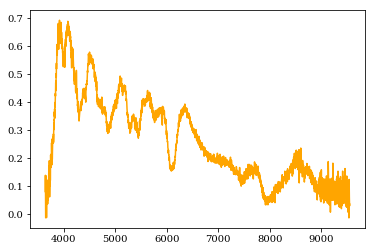

In [94]:
BmV_LV_arr = []
for spec in sn_arrays_kpora[0]:
    mags_LV = sa.measure_mags(spec.wavelength[spec.x1:spec.x2], spec.flux[spec.x1:spec.x2])
    print spec.name, 'B = ', mags_LV[0], 'V = ', mags_LV[1], 'B-V = ', mags_LV[0] - mags_LV[1]
    if ~np.isnan(mags_LV[0] - mags_LV[1]) and spec.wavelength[spec.x1]<3700 and spec.wavelength[spec.x2]>7000:
        BmV_LV_arr.append(mags_LV[0] - mags_LV[1])
        if mags_LV[0] - mags_LV[1] > .1:
            print spec.name
            plt.plot(spec.wavelength[spec.x1:spec.x2], spec.flux[spec.x1:spec.x2])
            plt.show()
BmV_HV_arr = []
for spec in sn_arrays_kpora[1]:
    mags_LV = sa.measure_mags(spec.wavelength[spec.x1:spec.x2], spec.flux[spec.x1:spec.x2])
    print spec.name, 'B = ', mags_LV[0], 'V = ', mags_LV[1], 'B-V = ', mags_LV[0] - mags_LV[1]
    if ~np.isnan(mags_LV[0] - mags_LV[1]) and spec.wavelength[spec.x1]<3700 and spec.wavelength[spec.x2]>7000:
        BmV_HV_arr.append(mags_LV[0] - mags_LV[1])
        if mags_LV[0] - mags_LV[1] > .1:
            print spec.name, spec.av_25
            plt.plot(spec.wavelength[spec.x1:spec.x2], spec.flux[spec.x1:spec.x2], color='orange')
            plt.show()

In [86]:
comp_LV = composites_kpora[0]
comp_HV = composites_kpora[1]

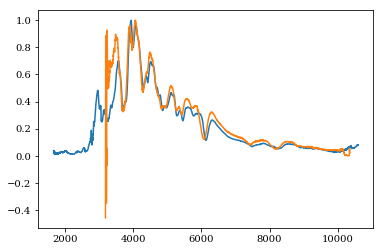

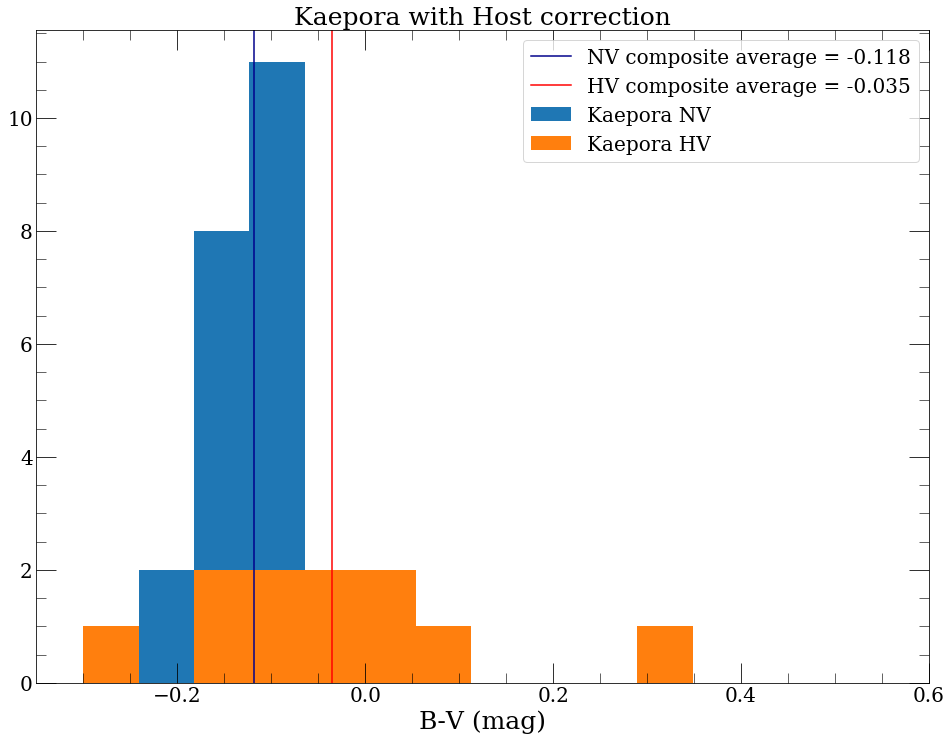

In [87]:
mags_LV_comp = sa.measure_mags(comp_LV.wavelength[comp_LV.x1:comp_LV.x2], comp_LV.flux[comp_LV.x1:comp_LV.x2])
mags_HV_comp = sa.measure_mags(comp_HV.wavelength[comp_HV.x1:comp_HV.x2], comp_HV.flux[comp_HV.x1:comp_HV.x2])
plt.plot(comp_LV.wavelength[comp_LV.x1:comp_LV.x2], comp_LV.flux[comp_LV.x1:comp_LV.x2])
plt.plot(comp_HV.wavelength[comp_HV.x1:comp_HV.x2], comp_HV.flux[comp_HV.x1:comp_HV.x2])
plt.show()
BmV_comp_LV = mags_LV_comp[0] - mags_LV_comp[1]
BmV_comp_HV = mags_HV_comp[0] - mags_HV_comp[1]

kplot.basic_format()
bins = np.linspace(-.3,2,num=40)
plt.hist(BmV_LV_arr,bins=bins, label = 'Kaepora NV')
plt.hist(BmV_HV_arr,bins=bins, label = 'Kaepora HV')
plt.axvline(BmV_comp_LV, color='darkblue', label = 'NV composite average = ' + str(np.round(BmV_comp_LV, 3)))
plt.axvline(BmV_comp_HV, color='red', label = 'HV composite average = ' + str(np.round(BmV_comp_HV, 3)))
plt.xlim(-.35,.6)
plt.xlabel('B-V (mag)', fontsize=25)
plt.legend(fontsize=20)
plt.title('Kaepora with Host correction', fontsize=25)
plt.savefig('../../Foundation/Dettman21/Kaepora_Colors_whost.pdf')
plt.show()

In [91]:
BmV_LV_arr_found = []
for spec in sn_arrays_found[0]:
    mags_LV = sa.measure_mags(spec.wavelength[spec.x1:spec.x2], spec.flux[spec.x1:spec.x2])
    print spec.name, 'B = ', mags_LV[0], 'V = ', mags_LV[1], 'B-V = ', mags_LV[0] - mags_LV[1]
    if ~np.isnan(mags_LV[0] - mags_LV[1]) and spec.wavelength[spec.x1]<3700 and spec.wavelength[spec.x2]>7000:
        BmV_LV_arr_found.append(mags_LV[0] - mags_LV[1])
BmV_HV_arr_found = []
for spec in sn_arrays_found[1]:
    mags_LV = sa.measure_mags(spec.wavelength[spec.x1:spec.x2], spec.flux[spec.x1:spec.x2])
    print spec.name, 'B = ', mags_LV[0], 'V = ', mags_LV[1], 'B-V = ', mags_LV[0] - mags_LV[1]
    if ~np.isnan(mags_LV[0] - mags_LV[1]) and spec.wavelength[spec.x1]<3700 and spec.wavelength[spec.x2]>7000:
        BmV_HV_arr_found.append(mags_LV[0] - mags_LV[1])

asassn15il B =  -20.08370079706274 V =  -20.05786427093513 B-V =  -0.025836526127609005
asassn15pn B =  -19.827340342316372 V =  -20.049663127006564 B-V =  0.22232278469019207
asassn15pr B =  -19.781324165144387 V =  -19.967163107431038 B-V =  0.18583894228665088
ps15ahs B =  -19.903862385558472 V =  -20.062604337591473 B-V =  0.1587419520330009
ps15aii B =  -20.03419199912174 V =  -20.03779766631406 B-V =  0.0036056671923176964
ps15bwh B =  -20.03746497746814 V =  -20.017196050138907 B-V =  -0.020268927329233577
ps16cqa B =  -19.770899324080094 V =  -20.082996247395705 B-V =  0.312096923315611
2016gmg B =  -20.24637992026205 V =  -20.065773625192254 B-V =  -0.18060629506979708
2016hhv B =  -20.16256531043468 V =  -20.02272810771146 B-V =  -0.1398372027232213
2017cfc B =  -19.952919659577322 V =  -20.020858488007406 B-V =  0.06793882843008348
2017cii B =  -20.027521046490694 V =  -20.034224309696366 B-V =  0.006703263205672272
2017ciy B =  -20.221119517201036 V =  -20.1600867791658 B-V

In [92]:
comp_LV_found = composites_found[0]
comp_HV_found = composites_found[1]

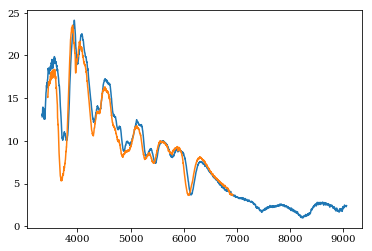

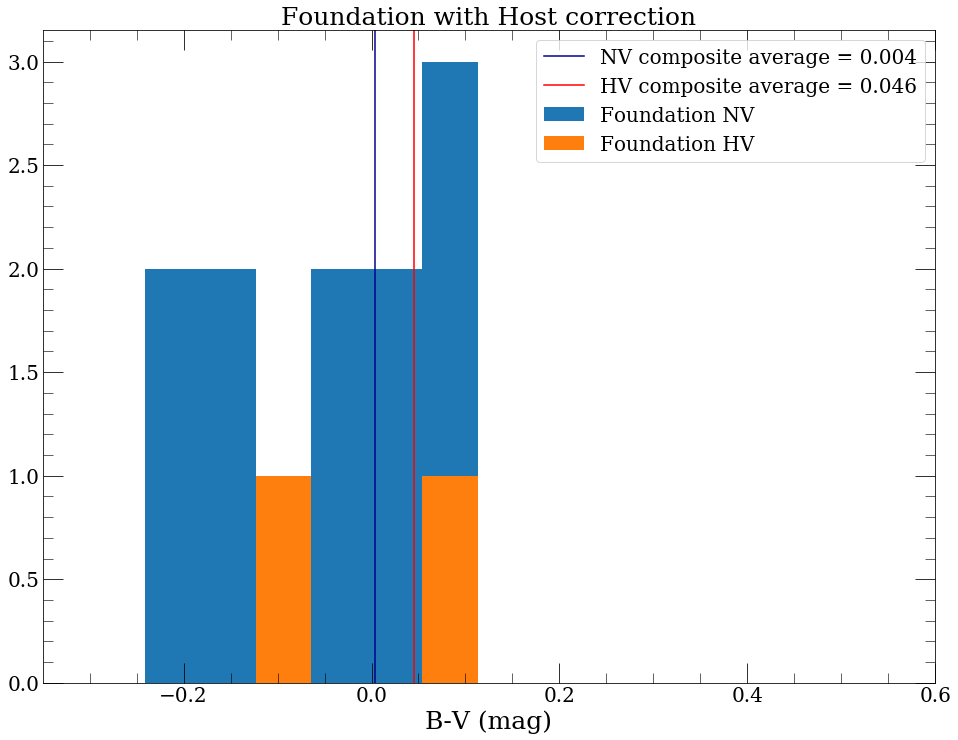

In [93]:
mags_LV_comp_found = sa.measure_mags(comp_LV_found.wavelength[comp_LV_found.x1:comp_LV_found.x2], comp_LV_found.flux[comp_LV_found.x1:comp_LV_found.x2])
mags_HV_comp_found = sa.measure_mags(comp_HV_found.wavelength[comp_HV_found.x1:comp_HV_found.x2], comp_HV_found.flux[comp_HV_found.x1:comp_HV_found.x2])
plt.plot(comp_LV_found.wavelength[comp_LV_found.x1:comp_LV_found.x2], comp_LV_found.flux[comp_LV_found.x1:comp_LV_found.x2])
plt.plot(comp_HV_found.wavelength[comp_HV_found.x1:comp_HV_found.x2], comp_HV_found.flux[comp_HV_found.x1:comp_HV_found.x2])
plt.show()
BmV_comp_LV_found = mags_LV_comp_found[0] - mags_LV_comp_found[1]
BmV_comp_HV_found = mags_HV_comp_found[0] - mags_HV_comp_found[1]

kplot.basic_format()
bins = np.linspace(-.3,2,num=40)
plt.hist(BmV_LV_arr_found,bins=bins, label = 'Foundation NV')
plt.hist(BmV_HV_arr_found,bins=bins, label = 'Foundation HV')
plt.axvline(BmV_comp_LV_found, color='darkblue', label = 'NV composite average = ' + str(np.round(BmV_comp_LV_found, 3)))
plt.axvline(BmV_comp_HV_found, color='red', label = 'HV composite average = ' + str(np.round(BmV_comp_HV_found, 3)))
plt.xlim(-.35,.6)
plt.xlabel('B-V (mag)', fontsize=25)
plt.legend(fontsize=20)
plt.title('Foundation with Host correction', fontsize=25)
plt.savefig('../../Foundation/Dettman21/Foundation_Colors_whost.pdf')
plt.show()